## 0_기본 설정 

### 라이브러리 불러오기

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 랜덤시드 설정

In [2]:
RANDOM_SEED = 42

### 데이터 불러오기

In [3]:
path_train = "../../../data/train/"  # 알잘딱 수정
path_eval = "../../../data/eval/"    # 알잘딱 수정

train_ratings = pd.read_csv(path_train + 'train_ratings.csv')
sample_submission = pd.read_csv(path_eval + 'sample_submission.csv')

directors_df = pd.read_csv(path_train + 'directors.tsv', sep='\t')
genres_df = pd.read_csv(path_train + 'genres.tsv', sep='\t')
titles_df = pd.read_csv(path_train + 'titles.tsv', sep='\t')
writers_df = pd.read_csv(path_train + 'writers.tsv', sep='\t')
years_df = pd.read_csv(path_train + 'years.tsv', sep='\t')

In [4]:
train_ratings

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563
...,...,...,...
5154466,138493,44022,1260209449
5154467,138493,4958,1260209482
5154468,138493,68319,1260209720
5154469,138493,40819,1260209726


In [31]:
# 각 데이터 확인 (알잘딱 수정 후 사용)

directors_df.tail()
# genres_df.head()
# titles_df.head()
# writers_df.head()
# years_df.head()

,item,director
5900,84273,nm2879822
5901,58376,nm2879822
5902,65225,nm2879822
5903,2394,nm9054338
5904,55768,nm9054338


## 1_item 별 directors, genres, titles, writers, years 중복여부 확인

### 1 directors

In [6]:
directors_df_sorted = directors_df.sort_values(by='item', ascending=True) \
                                  .set_index('item')    # reset_index(drop=True): 기존 인덱스 열 삭제 코드
directors_df_sorted.head(20)

,director
item,
1,nm0005124
2,nm0002653
3,nm0222043
4,nm0001845
5,nm0796124
6,nm0000520
7,nm0001628
8,nm0382072
9,nm0001382


In [7]:
directors_df_duplicated = directors_df_sorted.groupby('item')['director'].apply(lambda x: ', '.join(x.unique())).reset_index()
directors_df_duplicated.head(20)

,item,director
0,1,nm0005124
1,2,nm0002653
2,3,nm0222043
3,4,nm0001845
4,5,nm0796124
5,6,nm0000520
6,7,nm0001628
7,8,nm0382072
8,9,nm0001382
9,10,nm0132709


### 2 genres

In [8]:
genres_df_sorted = genres_df.sort_values(by='item', ascending=True) \
                                  .set_index('item')    # reset_index(drop=True): 기존 인덱스 열 삭제 코드
genres_df_sorted.head(20)

,genre
item,
1,Animation
1,Fantasy
1,Adventure
1,Children
1,Comedy
2,Fantasy
2,Adventure
2,Children
3,Romance


In [9]:
genres_df_duplicated = genres_df_sorted.groupby('item')['genre'].apply(lambda x: ', '.join(x.unique())).reset_index()
genres_df_duplicated.head(20)

,item,genre
0,1,"Animation, Fantasy, Adventure, Children, Comedy"
1,2,"Fantasy, Adventure, Children"
2,3,"Romance, Comedy"
3,4,"Comedy, Drama, Romance"
4,5,Comedy
5,6,"Thriller, Crime, Action"
6,7,"Romance, Comedy"
7,8,"Children, Adventure"
8,9,Action
9,10,"Thriller, Action, Adventure"


### 3 titles

In [10]:
titles_df_sorted = titles_df.sort_values(by='item', ascending=True) \
                                  .set_index('item')    # reset_index(drop=True): 기존 인덱스 열 삭제 코드
titles_df_sorted.head(20)

,title
item,
1,Toy Story (1995)
2,Jumanji (1995)
3,Grumpier Old Men (1995)
4,Waiting to Exhale (1995)
5,Father of the Bride Part II (1995)
6,Heat (1995)
7,Sabrina (1995)
8,Tom and Huck (1995)
9,Sudden Death (1995)


중복값 확인

In [11]:
titles_df_repeated = titles_df_sorted.duplicated(subset='title', keep=False)
titles_df_repeated

item
1         False
2         False
3         False
4         False
5         False
          ...  
118700    False
118900    False
118997    False
119141    False
119145    False
Length: 6807, dtype: bool

In [12]:
# 중복되는 title 갯수
num_repeated = (titles_df_repeated == True).sum()
num_repeated

2

In [13]:
# 중복되는 title의 item 고유번호
titles_df_repeated[titles_df_repeated == True]

item
34048    True
64997    True
dtype: bool

In [14]:
# 중복된 영화의 title
titles_df_sorted.loc[[34048, 64997], 'title']

item
34048    War of the Worlds (2005)
64997    War of the Worlds (2005)
Name: title, dtype: object

In [15]:
titles_df_duplicated = titles_df_sorted.groupby('item')['title'].apply(lambda x: ', '.join(x.unique())).reset_index().set_index('item')
titles_df_duplicated

,title
item,
1,Toy Story (1995)
2,Jumanji (1995)
3,Grumpier Old Men (1995)
4,Waiting to Exhale (1995)
5,Father of the Bride Part II (1995)
...,...
118700,Selma (2014)
118900,Wild (2014)
118997,Into the Woods (2014)


In [16]:
# print(titles_df_duplicated['item'] == 34048)  # 일반 컬럼으로 설정 시
# print(titles_df_duplicated['item'] == 64997)
# print(titles_df_duplicated.loc[34048])  # 인덱스로 설정 시
# print(titles_df_duplicated.loc[64997])

# titles_df_duplicated.loc[34000:34070]

### 4 writers

In [17]:
writers_df_sorted = writers_df.sort_values(by='item', ascending=True) \
                              .set_index('item')    # reset_index(drop=True): 기존 인덱스 열 삭제 코드
writers_df_sorted.head(20)

,writer
item,
1,nm0169505
1,nm0812513
1,nm0004056
1,nm0710020
1,nm0230032
1,nm0923736
1,nm0005124
2,nm0885575
2,nm0852430


In [18]:
writers_df_duplicated = writers_df_sorted.groupby('item')['writer'].apply(lambda x: ', '.join(x.unique())).reset_index()
writers_df_duplicated.head(20)

,item,writer
0,1,"nm0169505, nm0812513, nm0004056, nm0710020, nm..."
1,2,"nm0885575, nm0852430, nm0378144"
2,3,nm0425756
3,4,nm0060103
4,5,"nm0352443, nm0329304, nm0796124, nm0583600"
5,6,nm0000520
6,7,"nm0499626, nm0853138, nm0713128, nm0000697, nm..."
7,8,"nm0521739, nm0878494, nm0814085"
8,9,nm0704164
9,10,"nm0270761, nm0289833, nm0128997, nm0001220"


### 5 years

In [19]:
years_df_sorted = years_df.sort_values(by='item', ascending=True) \
                                  .set_index('item')    # reset_index(drop=True): 기존 인덱스 열 삭제 코드
years_df_sorted

,year
item,
1,1995
2,1995
3,1995
4,1995
5,1995
...,...
118696,2014
118700,2014
118900,2014


In [20]:
years_df_repeated = years_df_sorted.duplicated(subset='year', keep=False)
years_df_repeated

item
1         True
2         True
3         True
4         True
5         True
          ... 
118696    True
118700    True
118900    True
118997    True
119141    True
Length: 6799, dtype: bool

In [21]:
# 중복되는 years 갯수
num_repeated_years = (years_df_repeated == False).sum()
num_repeated_years

0

중복값 없음 -> 따로 처리 안해도 될듯

In [22]:
years_df_duplicated = years_df_sorted

# years_df_duplicated = years_df_sorted.groupby('item')['years'].apply(lambda x: ', '.join(x.unique())).reset_index()
# years_df_duplicated.head(20)

## 2_영화 정보 종합해서 한눈에 확인

In [23]:
# 공통 열 'item'기준으로 병합
movie_info = titles_df_duplicated.merge(genres_df_duplicated, on='item', how='outer') \
                      .merge(years_df_duplicated, on='item', how='outer') \
                      .merge(directors_df_duplicated, on='item', how='outer') \
                      .merge(writers_df_duplicated, on='item', how='outer')

In [24]:
movie_info.head(10)

,item,title,genre,year,director,writer
0,1,Toy Story (1995),"Animation, Fantasy, Adventure, Children, Comedy",1995.0,nm0005124,"nm0169505, nm0812513, nm0004056, nm0710020, nm..."
1,2,Jumanji (1995),"Fantasy, Adventure, Children",1995.0,nm0002653,"nm0885575, nm0852430, nm0378144"
2,3,Grumpier Old Men (1995),"Romance, Comedy",1995.0,nm0222043,nm0425756
3,4,Waiting to Exhale (1995),"Comedy, Drama, Romance",1995.0,nm0001845,nm0060103
4,5,Father of the Bride Part II (1995),Comedy,1995.0,nm0796124,"nm0352443, nm0329304, nm0796124, nm0583600"
5,6,Heat (1995),"Thriller, Crime, Action",1995.0,nm0000520,nm0000520
6,7,Sabrina (1995),"Romance, Comedy",1995.0,nm0001628,"nm0499626, nm0853138, nm0713128, nm0000697, nm..."
7,8,Tom and Huck (1995),"Children, Adventure",1995.0,nm0382072,"nm0521739, nm0878494, nm0814085"
8,9,Sudden Death (1995),Action,1995.0,nm0001382,nm0704164
9,10,GoldenEye (1995),"Thriller, Action, Adventure",1995.0,nm0132709,"nm0270761, nm0289833, nm0128997, nm0001220"


## 3_사용자의 행동 분석

### 1 각 사용자가 평가한 영화 수 분포

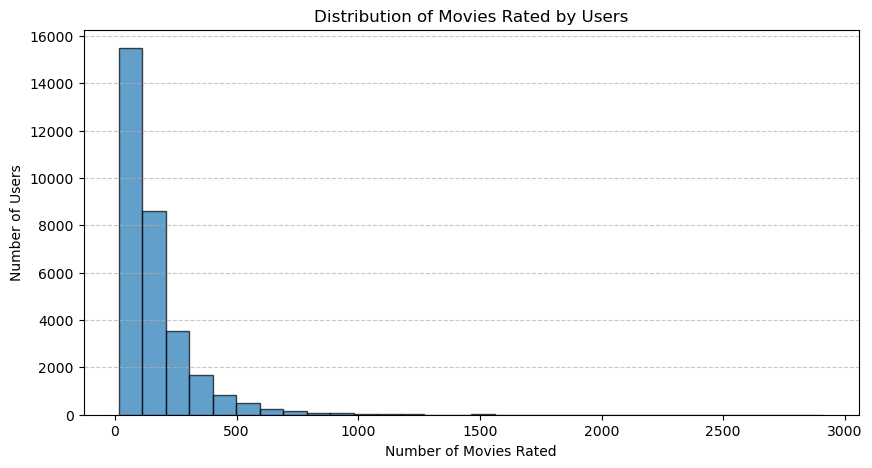

In [25]:
user_movie_counts = train_ratings.groupby('user')['item'].count()

# 사용자별 평가 영화 수 히스토그램
plt.figure(figsize=(10, 5))
plt.hist(user_movie_counts, bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of Movies Rated by Users")
plt.xlabel("Number of Movies Rated")
plt.ylabel("Number of Users")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2 각 영화가 평가받은 횟수 분포

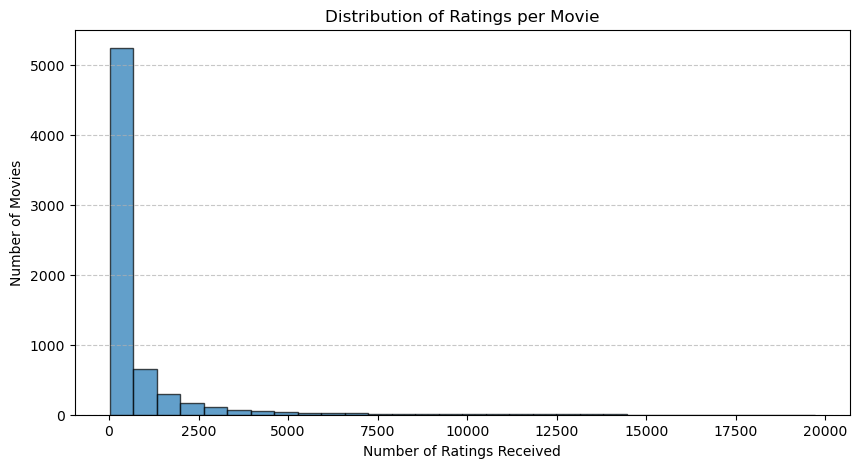

In [26]:
movie_user_counts = train_ratings.groupby('item')['user'].count()

# 영화별 평가 받은 횟수 히스토그램
plt.figure(figsize=(10, 5))
plt.hist(movie_user_counts, bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of Ratings per Movie")
plt.xlabel("Number of Ratings Received")
plt.ylabel("Number of Movies")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3 사용자와 영화의 평가 분포 요약

In [27]:
user_stats = user_movie_counts.describe()
movie_stats = movie_user_counts.describe()

In [28]:
# 사용자 행동 분석 통계 데이터 출력
user_stats, movie_stats

(count    31360.000000
 mean       164.364509
 std        150.009107
 min         16.000000
 25%         71.000000
 50%        114.000000
 75%        200.000000
 max       2912.000000
 Name: item, dtype: float64,
 count     6807.000000
 mean       757.230939
 std       1682.973090
 min         27.000000
 25%         90.000000
 50%        197.000000
 75%        610.500000
 max      19699.000000
 Name: user, dtype: float64)

### 4 한 유저가 같은 작품을 두 번 이상 평가한적 있는지 확인

In [29]:
duplicate_ratings = train_ratings.duplicated(subset=['user', 'item'], keep=False)
duplicate_ratings

0          False
1          False
2          False
3          False
4          False
           ...  
5154466    False
5154467    False
5154468    False
5154469    False
5154470    False
Length: 5154471, dtype: bool

In [30]:
num_duplicates = duplicate_ratings.sum()
num_duplicates

0